# Homework 3

### Due: Friday Dec. 1st @ 11:59pm

In this homework we will be performing 

- feature cleaning and engineering

- dimensionality reduction with feature selection and extraction

## Instructions

- Replace Name and UNI in the first cell and filename
- Follow the comments below and fill in the blanks (\_\_\_\_) to complete.
- Where not specified, please run functions with default argument settings.
- Please **'Restart and Run All'** prior to submission.
- **Save pdf in Landscape** and **check that all of your code is shown** in the submission.
- When submitting in Gradescope, be sure to **select which page corresponds to which question.**

Out of 50 points total.

# Part 0: Environment Setup

In [ ]:
# 1. (2pts total) Homework Submission

# (1pt) The homework should be spread over multiple pdf pages, not one single pdf page
# (1pt) When submitting, assign each question to the pdf page where the solution is printed.
#        If there is no print statement for a question, assign the question to the first pdf 
#        page where the code for the question is visible.

In [26]:
# 2. (1pts) Set up our environment with comman libraries and plotting.
#    Note: generally we would do all of our imports here but some imports
#    have been left till later where they are used.

# Import numpy, pandas, matplotlib.pyplot and seaborn with our usual aliases.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style to darkgrid
sns.set_style("darkgrid")

# Execute the matplotlib magic function to display plots inline
%matplotlib inline

# Part 1: Data Cleaning and Feature Selection

In this section we will be loading, cleaning and transforming a small set of data related to loan applications.

There are two files, one containing loan application information and the other containing borrower information.

You will need to load both files, join them and then transform this data, creating a new dataframe with features which could then be used for modeling.

## Data Preparation

In [27]:
# 3. (1pts) Load Loan Application Data

# Read in the first dataframe containing loan application information.
#  The path to the datafile is '../data/hw3_loan.csv'.
#  Use the appropriate pandas command to read a csv file with default arguments.
# Store this dataframe as df_loan.
df_loan = pd.read_csv('../data/hw3_loan.csv')

# Assert that the data is the correct shape
assert df_loan.shape == (664,4)

# Print the output of .info() called on df_loan 
#  Note that 2 columns have missing values
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          664 non-null    int64  
 1   WasTheLoanApproved  664 non-null    object 
 2   LoanReason          641 non-null    object 
 3   RequestedAmount     652 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.9+ KB


In [28]:
# 4. (2pts) Deal with Duplicates

# Display rows with duplicate CustomerIDs
#  remember to use subset= to set the column of interest
#  use keep=False to show all duplicates
# We should see a DataFrame with 2 rows
duplicates = df_loan[df_loan.duplicated(subset='CustomerID', keep=False)]
print(duplicates)

# Drop one of the rows with duplicate CustomerID,
#   keeping the first duplicate row (default)
# Store into df_loan_nodups
df_loan_nodups = df_loan.drop_duplicates(subset='CustomerID', keep='first')

# We should only drop one row
assert df_loan_nodups.shape == (663,4)

     CustomerID WasTheLoanApproved LoanReason  RequestedAmount
650         736                  N     school           1001.0
651         736                  Y      other           2169.0


In [29]:
# 5. (1pts) Set the Index of df_loan_nodups

# Set the index of df_loan_nodups to the CustomerID column to make joining easier
#  use .set_index()
#  drop the original index
# Store back into df_loan_nodups
df_loan_nodups = df_loan_nodups.set_index('CustomerID')

# Display the first 3 rows of df_loan_nodups to visually confirm that the index has been set
#  You should see 3 rows and 3 columns
# Note that that the index CustomerID starts at 2 instead of 0
print(df_loan_nodups.head(3))

           WasTheLoanApproved LoanReason  RequestedAmount
CustomerID                                               
2                           Y      goods           3074.0
3                           Y       auto            939.0
4                           Y       auto           2507.0


In [30]:
# 6. (1pts) Load Borrower Data

# Read in a second table containing borrower information.
#  The path to the datafile is '../data/hw3_borrower.csv'.
#  Use the appropriate pandas command to read a csv file.
#  IMPORTANT: set the index as the 'CustomerID' column using the index_col= argument.
#  Store this dataframe as df_borrower.
df_borrower = pd.read_csv('../data/hw3_borrower.csv', index_col='CustomerID')

# Assert that the data is the correct shape
assert df_borrower.shape == (663,1)

# Print the output of .info() called on df_borrower
#  Note that the index has been set and there are no missing values
df_borrower.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663 entries, 2 to 750
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     663 non-null    float64
dtypes: float64(1)
memory usage: 10.4 KB


In [31]:
# 7. (2pts) Join Datasets

# Join the df_loan_nodups and df_borrower datasets
# Perform a left join, with df_loan_nodups as the "left" table 
#    and df_borrower as the "right".
# Since the dataframes share an index (CustomerID), it is convenient 
#    to use the .join() function instead of .merge().
# Store the resulting dataframe as df
df = df_loan_nodups.join(df_borrower, how='left')

# Assert that the data is the correct shape
assert df.shape == (663,4)

# Print the output of .info() called on df
# There should still be 663 rows but now 4 columns, 2 with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663 entries, 2 to 750
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WasTheLoanApproved  663 non-null    object 
 1   LoanReason          640 non-null    object 
 2   RequestedAmount     651 non-null    float64
 3   Age                 663 non-null    float64
dtypes: float64(2), object(2)
memory usage: 25.9+ KB


## Data Exploration and Transformation

In [32]:
# 8. (1pts) Create df_features

# We'll perform the transformations below to get the data ready for modeling.
#
# Instead of adding transformed features into our original dataframe (df)
#   it is convenient to create a new dataframe containing only features.
# This will eventually be the X features for our models.

# Create a new, empty, DataFrame called df_features that has the same index as df (index=df.index)
df_features = pd.DataFrame(index=df.index)

# Print the output of .info() called on df_features
# The index should match the index of df above, but empty otherwise
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663 entries, 2 to 750
Empty DataFrame


### RequestedAmount

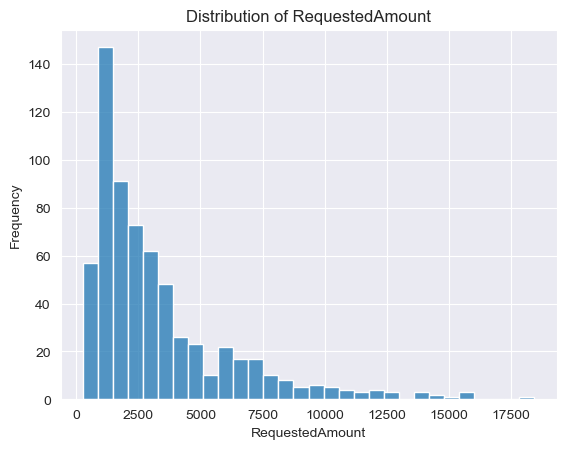

In [33]:
# 9. (1pts) Plot RequestedAmount

# RequestedAmount is a numeric feature with missing values

# Use seaborn histplot to plot df.RequestedAmount using default settings.
# Note that this feature is right skewed and has a wide range.
# Plot df.RequestedAmount using seaborn histplot with default settings
sns.histplot(df['RequestedAmount'], kde=False)
plt.title('Distribution of RequestedAmount')
plt.xlabel('RequestedAmount')
plt.ylabel('Frequency')
plt.show()

In [34]:
# 10. (2pts) Create Dummy Column for Missing RequestedAmount 

# Before filling the missing values we should create a dummy variable to capture which rows had missing values

# Find the rows where RequestedAmount is missing and convert the resulting boolean values to integers
# Store in df_features as 'RequestedAmount_missing'.
df_features['RequestedAmount_missing'] = df['RequestedAmount'].isnull().astype(int)

# Print the number of 0s and 1s in the RequestedAmount_missing column using .value_counts().
#   (There should be 12 1s meaning that there are 12 missing values)
print(df_features['RequestedAmount_missing'].value_counts())

RequestedAmount_missing
0    651
1     12
Name: count, dtype: int64


In [35]:
# 11. (2pts) Fill Missing Values in RequestedAmount

# As RequestedAmount is right skewed, we'll fill missing values using median instead of mean.

# Print the median of RequestedAmount before filling
requested_amount_median = df['RequestedAmount'].median()
print(f'RequestedAmount median        : {requested_amount_median}')

# Use fillna() to fill the missing values in RequestedAmount with the median of RequestedAmount
# We'll make two more transformations to this column before storing it as a feature so store back into df as 'RequestedAmount_filled'
df['RequestedAmount_filled'] = df['RequestedAmount'].fillna(requested_amount_median)

# Print the median of RequestedAmount_filled
#  The median should not have changed after filling
print(f'RequestedAmount_filled median : {df.RequestedAmount_filled.median()}')

# Assert that there are no longer any missing values in the RequestedAmount_filled column of df
assert df['RequestedAmount_filled'].isnull().sum() == 0

RequestedAmount median        : 2329.0
RequestedAmount_filled median : 2329.0


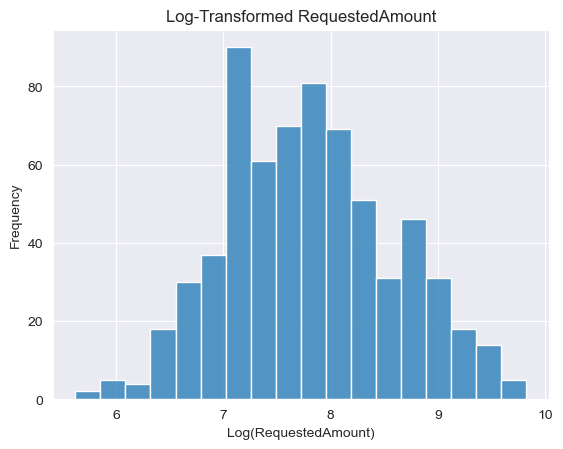

In [36]:
#12. (2pts) Log Transform RequestedAmount

# Using .apply(), apply np.log (without parentheses) to the RequestedAmount_filled column.
# Store the result back into df as RequestedAmount_log
df['RequestedAmount_log'] = df['RequestedAmount_filled'].apply(np.log)

# Use seaborn histplot() (using default settings) to plot RequestedAmount_log 
# Note that the shape is now closer to a normal distribution
sns.histplot(df['RequestedAmount_log'], kde=False)
plt.title('Log-Transformed RequestedAmount')
plt.xlabel('Log(RequestedAmount)')
plt.ylabel('Frequency')
plt.show()

In [37]:
# 13. (3pts) Center and Scale RequestedAmount_log Using StandardScaler

# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Using StandardScaler (with default settings) 
#   run fit_transform() to standardize RequestedAmount_log
# Note that fit_transform expects a DataFrame not a Series 
#   Recall: we can get a DataFrame containing one column by indexing using a list
# Store the result in df_features as 'RequestedAmount_logscaled'
scaler = StandardScaler()
df_features['RequestedAmount_logscaled'] = scaler.fit_transform(df[['RequestedAmount_log']])

# Confirm that scaling has been applied properly by printing out 
#    the 'mean' and 'std' of df_features.RequestedAmount_logscaled
#    using the .agg() function 
#    rounded to a precision of 2
scaled_stats = df_features['RequestedAmount_logscaled'].agg(['mean','std']).round(2)
print(scaled_stats)

mean   -0.0
std     1.0
Name: RequestedAmount_logscaled, dtype: float64


### LoanReason

In [38]:
# 14. (1pts) LoanReason Values

# df.LoanReason is a categorical variable.

# Print the frequency counts of each category, including missing values
#   using .value_counts() with dropna=False
# (You should see a row for NaN indicating 23 missing values)
print(df['LoanReason'].value_counts(dropna=False))

LoanReason
goods     299
auto      210
other      87
school     44
NaN        23
Name: count, dtype: int64


In [39]:
# 15. (2pts) Fill Missing Values in LoanReason and Store in df_features

# Since this is a categorical variable, instead of creating a "missing" dummy column
#    we'll simply fill the missing values with the string 'MISSING'

# Fill the missing values of LoanReason with the string 'MISSING'
# Store into df_features as LoanReason
df_features['LoanReason'] = df['LoanReason'].fillna('MISSING')

# Print the number of items in each category in df_features.LoanReason, including nan's
#   using value_counts() with dropna=False
# (You should see a row for MISSING but no row for NaN)
print(df_features['LoanReason'].value_counts(dropna=False))

# We'll deal with One-Hot Encoding LoanReason after dealing with Age

LoanReason
goods      299
auto       210
other       87
school      44
MISSING     23
Name: count, dtype: int64


### Age

In [40]:
# 16. (2pts) Scale and Store Ages

# The last variable we'll deal with the numeric variable Age.

# Assert that df.Age doesn't have any missing values
assert df.Age.isnull().sum() == 0

# Print the min and max values for df.Age using .agg()
age_stats = df.Age.agg(['min','max'])
print(age_stats)

min    19.0
max    75.0
Name: Age, dtype: float64


In [41]:
# 17. (1pts) Create Age Bin Edges for Age

# We'll transform Age into a categorical variable using binning.
# Note that this is for practice and there aren't any clear indications
#    in the data that we should be binning this way.

# We'll bin Age into 3 three equal sized groups
# To get the bin edges use the Series .quantile() method
# The quantiles we want are q=[0,.33,.66,1]
# Store the bin edges as age_bins
age_bins = df.Age.quantile([0,.33,.66,1])

# Print the bin edges
# Rows labeled 0.00 and 1.00 should have values that match the Age min and max seen printed above
print(age_bins)

0.00    19.0
0.33    29.0
0.66    39.0
1.00    75.0
Name: Age, dtype: float64


In [42]:
# 18. (2pts) Bin Age

# Use pd.cut() to bin Age
#  Use the age_bins list we created above for the bin edges.
#  Set right=True to include right edge in each bin.
#  Set include_lowest=True to include the minimum value in the first bin.
#  All other arguments as their default.
# Store in df_features as Age
df_features['Age'] = pd.cut(df['Age'], bins=age_bins, right=True, include_lowest=True)

# Print the first 3 rows of df_features.Age
# By default, the label names are the bin edges
print(df_features.Age.head(3))

print() # print a blank line

# Also, print the first 3 rows of df.Age to visually confirm the correct bins have been applied
print(df.Age.head(3))

CustomerID
2      (29.0, 39.0]
3    (18.999, 29.0]
4      (39.0, 75.0]
Name: Age, dtype: category
Categories (3, interval[float64, right]): [(18.999, 29.0] < (29.0, 39.0] < (39.0, 75.0]]

CustomerID
2    33.0
3    28.0
4    51.0
Name: Age, dtype: float64


### One-Hot Encode Categorical Variables

In [54]:
# 19. (3pts) Transform LoanReason and Age Bins using One-Hot Encoding

# Once we One-Hot Encode our features, the number of columns can increase dramitically.
# For DataFrames with many columns it is helpful to display the transpose of a subset of rows.

# Display the first 3 rows of df_features
#  rounded to a precision of 2
#  transposed using .transpose() or .T
# Should see 4 rows, 3 columns
print(df_features.round(2).head(3).T)

CustomerID                            2               3             4
RequestedAmount_missing               0               0             0
RequestedAmount_logscaled          0.31           -1.21          0.04
LoanReason                        goods            auto          auto
Age                        (29.0, 39.0]  (18.999, 29.0]  (39.0, 75.0]


In [55]:
# Use pd.get_dummies() to encode the categorical variables
#  Pass the entire df_features DataFrame
#  Note: pd.get_dummies() will encode any columns with dtype `object` or `category`
# Store as df_features_ohe
df_features_ohe = pd.get_dummies(df_features)

# Display the first 3 rows of df_features_ohe rounded to a precision of 2 transposed
# Now we should see 10 rows and 3 columns
# Note that all features are numeric and the One-Hot Encoding has been applied
print(df_features_ohe.round(2).head(3).T)

# Assert that df_features_ohe now has 663 rows and 10 columns
assert df_features_ohe.shape == (663,10)

CustomerID                     2      3      4
RequestedAmount_missing        0      0      0
RequestedAmount_logscaled   0.31  -1.21   0.04
LoanReason_MISSING         False  False  False
LoanReason_auto            False   True   True
LoanReason_goods            True  False  False
LoanReason_other           False  False  False
LoanReason_school          False  False  False
Age_(18.999, 29.0]         False   True  False
Age_(29.0, 39.0]            True  False  False
Age_(39.0, 75.0]           False  False   True


# Part 2: Feature Selection

In [44]:
# 20. (2pts) Transform Target 

# The target we're interested in predicting is df.WasTheLoanApproved.
# This is a categorical variable taking the values Y for yes and N for no

# Transform the target df.WasTheLoanApproved into integers where Y maps to 1 and N maps to 0 using .map()
# Recall .map() takes a dictionary of key:value pairs where
#   keys   = what you want to map from
#   values = what you want to map to
# Store the resulting Series in y
y = df.WasTheLoanApproved.map({'Y': 1, 'N': 0})

# Print the proportion of positives (1's) in y with a precision of 2
#  Note that there are more 1's than 0's
#  We can use this as our baseline accuracy (what would be found by a DummyClassifier)
#  We'd like to find a model that does better than this
proportion_positives = y.mean().round(2)
print(f'proportion of positives in y: {proportion_positives}')

proportion of positives in y: 0.59


In [45]:
# 21. (1pts) Split the Data

# Before we continue we should split up our data into a train and test set

# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Generate a training and test set from df_features_ohe and y
#   with test_size of 10% of the data
#   stratified by y
#   and random_state=512
# Store in X_train,X_test,y_train,y_test
X_train, X_test, y_train, y_test = train_test_split(df_features_ohe, y, test_size=0.1, stratify=y, random_state=512)

# Assert that X_train has 596 rows, 10 columns
assert X_train.shape == (596,10)

# Print the proportion of 1s in y_test rounded to a precision of 2
#  to visually confirm that the proportion is close to that seen in y (plus or minus .01)
proportion_test_positives = y_test.mean().round(2)
print(f'proportion of positives in y_test: {proportion_test_positives}')

proportion of positives in y_test: 0.6


In [47]:
#22. (3pts) Rank Feature Importance Using GradientBoostingClassifier

# Import GradientBoostingClassifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate a GradientBoostingClassifier object
#  with n_estimators=10, 
#  max_depth=5,
#  and all other arguments as their default.
# Store as gbc
gbc = GradientBoostingClassifier(n_estimators=10, max_depth=5, random_state=512)

# Fit gbc on the training set
gbc.fit(X_train, y_train)

# The feature_importances_ stored in gbc are in the order of the columns of X_train
# Create a new Series 
#    with values from gbc.feature_importances_
#    with the index set to the columns of X_train
# Store in gbc_feature_importances
gbc_feature_importances = pd.Series(data = gbc.feature_importances_, index=X_train.columns)

# Display feature_importances sorted by value descending rounded to a precision of 2
# Note that the most informative feature should be RequestedAmount_logscaled
print(gbc_feature_importances.sort_values(ascending=False).round(2))

RequestedAmount_logscaled    0.49
Age_(18.999, 29.0]           0.38
Age_(29.0, 39.0]             0.03
LoanReason_auto              0.02
LoanReason_school            0.02
Age_(39.0, 75.0]             0.02
LoanReason_other             0.02
LoanReason_goods             0.02
RequestedAmount_missing      0.01
LoanReason_MISSING           0.00
dtype: float64


In [48]:
# 23. (3pts) Feature Selection with SelectFromModel

# Import SelectFromModel from sklearn
from sklearn.feature_selection import SelectFromModel

# Instantiate a SelectFromModel transformer with
#   gbc as the estimator 
#   threshold='mean' (the default)
#   prefit=False (the default)
#   fit on X_train,y_train to avoid a warning about missing feature_names below
# Store as sfm
sfm = SelectFromModel(estimator=gbc, threshold='mean', prefit=False).fit(X_train, y_train)

# Show the selected features using X_train.columns and sfm.get_support()
# Recall that sfm.get_support() returns a boolean mask over the features
#   with a value of True where the feature has been selected
# The features shown should be the top 2 features listed in the previous cell
selected_features = X_train.columns[sfm.get_support()]
print(selected_features.tolist())

['RequestedAmount_logscaled', 'Age_(18.999, 29.0]']


In [49]:
# 24. (2pts) Transform Data Using Selected Features

# Create a new dataset using only the features selected in the previous step.
# Use sfm to transform X_train and store as X_train_fs
X_train_fs = sfm.transform(X_train)

# Use sfm to transform X_test and store as X_test_fs
X_test_fs = sfm.transform(X_test)

# Assert that X_train_fs has 596 rows and 2 columns.
assert X_train_fs.shape == (596,2)

# Print the first 3 rows of X_train_fs, rounded to a precision of 2
# Note that this will be a numpy array and not a DataFrame
print(np.round(X_train_fs[:3],2))

[[ 0.13  1.  ]
 [-1.28  0.  ]
 [ 0.08  0.  ]]


In [51]:
# 25. (2pts) Train and Evaluate Model On Selected Features

# Instantiate a new GradientBoostingClassifier
#   with n_estimators=10, 
#   max_depth=5,
#   and all other parameters as the default
# Store in gbc_fs
gbc_fs = GradientBoostingClassifier(n_estimators=10, max_depth=5, random_state=512)

# Train the gbc_fs model on X_train_fs and y_train
gbc_fs.fit(X_train_fs, y_train)

# Print the accuracy achieved by gbc_fs on both 
#   the training (X_train_fs,y_train) and test set (X_test_fs,y_test) 
#   with precision of 2 decimal places in both cases
# On both we should do better than the baseline accuracy calculated above
train_accuracy = round(gbc_fs.score(X_train_fs, y_train), 2)
test_accuracy = round(gbc_fs.score(X_test_fs, y_test), 2)
print(f'training accuracy: {train_accuracy}')
print(f'test accuracy    : {test_accuracy}')

training accuracy: 0.77
test accuracy    : 0.69


## Part 3: Feature Extraction

In [52]:
# 26. (3pts) Reduce Dataset to 2D Using PCA

# Import PCA from sklearn
from sklearn.decomposition import PCA

# Instantiate a pca object with
#   n_components=2
#   random_state=512
# Store as pca
pca = PCA (n_components=2, random_state=512)

# Fit and transform the full X_train to 2D using pca
# Store in X_train_pca
X_train_pca = pca.fit_transform(X_train)

# Transform (but don't fit!) the X_test to 2D using the trained pca
# Store in X_test_pca
X_test_pca = pca.transform(X_test)

# Print the ratio of variance explained by each component in pca, rounded to a precision of 2
explained_variance = pca.explained_variance_ratio_.round(2)
print(explained_variance)

[0.44 0.16]


In [53]:
# 27. (2pts) Train and evaluate a classifier using the PCA representation

# Train a new GradientBoostingClassifier
#  with n_estimators=10
#  and max_depth=5
#  on X_train_pca, y_train
# Store as gbc_pca
gbc_pca = GradientBoostingClassifier(n_estimators=10, max_depth=5, random_state = 512)
gbc_pca.fit(X_train_pca, y_train)

# Print the accuracy achieved by gbc_pca on both 
#   the training (X_train_pca,y_train) and test set (X_test_pca,y_test) 
#   with precision of 2 decimal places in both cases
# Note that, while the gbc_pca model is not performing quite as well as gbc_fs,
#   the first 2 components of the PCA representation are only explaining 60% of the variation in the dataset
train_accuracy_pca = round(gbc_pca.score(X_train_pca, y_train), 2)
test_accuracy_pca = round(gbc_pca.score(X_test_pca, y_test), 2)
print(f'training accuracy: {train_accuracy_pca}')
print(f'test accuracy    : {test_accuracy_pca}')

training accuracy: 0.72
test accuracy    : 0.66
